### Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

### Prepare/collect data

In [2]:
path = os.listdir('dataset/train-data')
classes = {'zero':0, 'one':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'dataset/train-data/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)
print(len(X))
print(len(Y))

12952
12952


In [5]:
np.unique(Y)

array([0, 1])

In [6]:
pd.Series(Y).value_counts()

1    7922
0    5030
Name: count, dtype: int64

In [7]:
X.shape, X_updated.shape

((12952, 200, 200), (12952, 40000))

### Visualize data

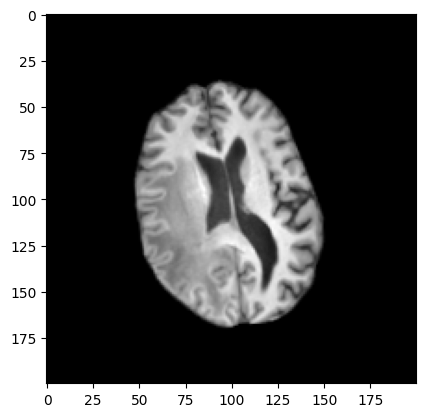

In [8]:
plt.imshow(X[5], cmap='gray')

### Prepare data

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(12952, 40000)

### Split Data

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.30)

In [11]:
xtrain.shape, xtest.shape

((9066, 40000), (3886, 40000))

### Feature Scaling

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [13]:
from sklearn.decomposition import PCA

from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X=ICA.fit_transform(xtrain)

In [14]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest    

(9066, 40000) (3886, 40000)


In [15]:
print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

(9066, 40000) (3886, 40000)


### Train Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [18]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### Evaluation

In [20]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.8216412971542025
Testing Score: 0.783067421513124


### Prediction

In [21]:
pred = sv.predict(xtest)


In [22]:
misclassified=np.where(ytest!=pred)
misclassified

(array([   3,    4,    6,    7,    9,   15,   21,   28,   32,   36,   43,
          46,   48,   49,   50,   53,   55,   60,   73,   78,   80,   83,
          86,   91,   92,   93,   94,  100,  101,  109,  113,  122,  126,
         128,  134,  140,  144,  147,  153,  158,  164,  165,  174,  177,
         179,  180,  181,  184,  188,  190,  199,  204,  207,  209,  212,
         218,  220,  227,  240,  242,  243,  247,  248,  256,  270,  278,
         282,  286,  287,  289,  297,  305,  306,  313,  314,  330,  331,
         332,  336,  340,  349,  351,  352,  359,  363,  368,  371,  372,
         374,  375,  377,  380,  381,  384,  389,  392,  398,  400,  403,
         405,  407,  409,  411,  426,  430,  438,  443,  453,  458,  462,
         479,  493,  504,  507,  508,  510,  515,  516,  517,  529,  530,
         537,  544,  546,  548,  551,  554,  555,  556,  557,  558,  583,
         584,  585,  589,  597,  598,  600,  601,  605,  607,  608,  609,
         612,  615,  616,  621,  622, 

In [23]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  843
0 1


### TEST MODEL

In [31]:
dec = {0:'Zero methylation', 1:'One methylation'}

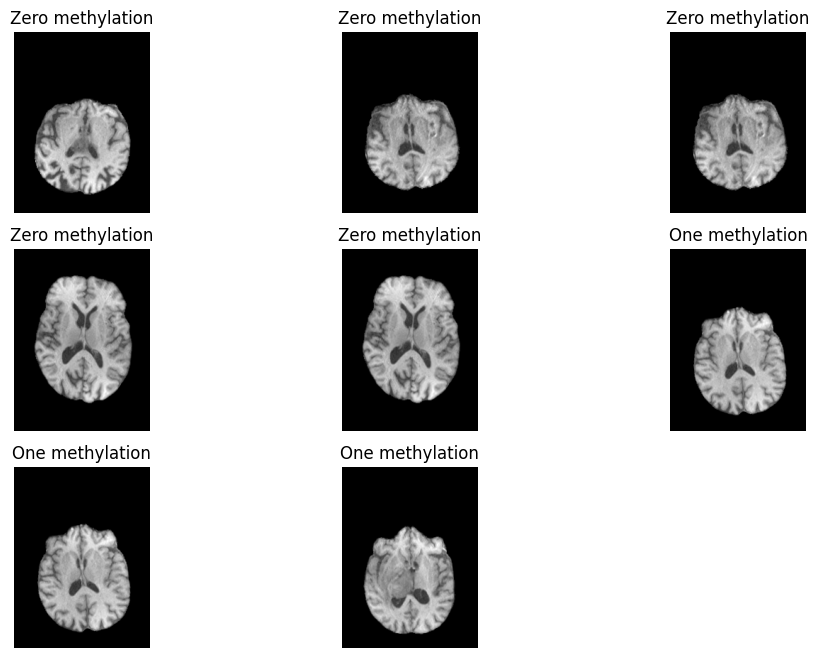

In [34]:
plt.figure(figsize=(12,8))
p = os.listdir('dataset/test-data/test/')
c=1
for i in os.listdir('dataset/test-data/test/')[100:108]:
    plt.subplot(3,3,c)
    
    # print(i[0])
    img = cv2.imread('dataset/test-data/test/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Compute evaluation metrics
accuracy = accuracy_score(ytest, pred)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1 = f1_score(ytest, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.783067421513124
Precision: 0.7722701149425287
Recall: 0.9114031369224248
F1 Score: 0.8360878864475987
